In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


/tmp/ipykernel_4989/3541601474.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
accidents_df = pd.read_csv('src/Accidents.txt', index_col=0, encoding='ISO-8859-1', sep='\t')
accidents_df.head()


,Gravity,Date,Hour,Light,Department,Commune,InAgglomeration,IntersectionType,Weather,CollisionType,PostalAddress
AccidentId,,,,,,,,,,,
201800000001,NonLethal,2018-01-24,15:05:00,Daylight,590,5,No,Y-type,Normal,2Vehicles-BehindVehicles-Frontal,route des Ansereuilles
201800000002,NonLethal,2018-02-12,10:15:00,Daylight,590,11,Yes,Square,VeryGood,NoCollision,Place du général de Gaul
201800000003,NonLethal,2018-03-04,11:35:00,Daylight,590,477,Yes,T-type,Normal,NoCollision,Rue nationale
201800000004,NonLethal,2018-05-05,17:35:00,Daylight,590,52,Yes,NoIntersection,VeryGood,2Vehicles-Side,30 rue Jules Guesde
201800000005,NonLethal,2018-06-26,16:05:00,Daylight,590,477,Yes,NoIntersection,Normal,2Vehicles-Side,72 rue Victor Hugo


<Axes: xlabel='Gravity'>

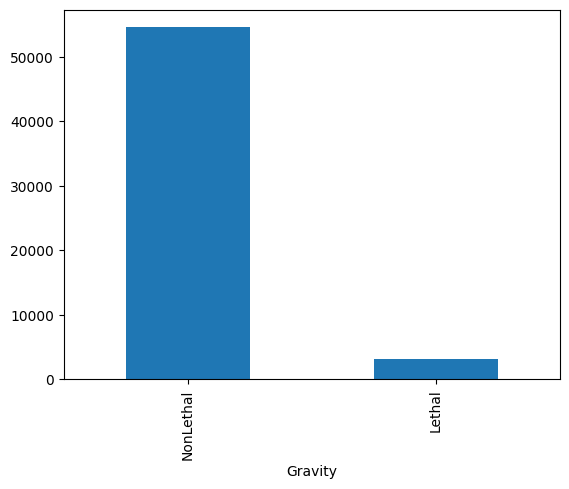

In [23]:
accidents_df.Gravity.value_counts().plot(kind='bar')

In [28]:
accidents_df.describe(include='object')

,Gravity,Date,Hour,Light,InAgglomeration,IntersectionType,Weather,CollisionType,PostalAddress
count,57783,57783,57783,57783,57783,57783,57778,57781,57228
unique,2,365,1362,5,2,9,9,7,37076
top,NonLethal,2018-10-05,18:00:00,Daylight,Yes,NoIntersection,Normal,Other,AUTOROUTE A86
freq,54597,265,753,38701,37060,38313,45824,19522,295


In [14]:
users_df = pd.read_csv('src/Users.txt', index_col=0, encoding='ISO-8859-1', sep='\t')
users_df.head()


,VehicleId,Seat,Category,Gravity,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany,BirthYear
AccidentId,,,,,,,,,,,,
201800000001,A01,1.0,Driver,Unscathed,Male,Leisure,SeatBelt,Yes,NaN,NaN,Unknown,1960.0
201800000001,B01,1.0,Driver,InjuredAndHospitalized,Male,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1928.0
201800000002,A01,1.0,Driver,Unscathed,Male,NaN,SeatBelt,Yes,NaN,NaN,Unknown,1947.0
201800000002,A01,NaN,Pedestrian,MildlyInjured,Male,NaN,Helmet,NaN,OnLane<=OnSidewalk0mCrossing,Crossing,Alone,1959.0
201800000003,A01,1.0,Driver,InjuredAndHospitalized,Male,Leisure,Helmet,Yes,NaN,NaN,Unknown,1987.0


In [29]:
users_df.describe(include='object')

,VehicleId,Category,Gravity,Gender,TripReason,SafetyDevice,SafetyDeviceUsed,PedestrianLocation,PedestrianAction,PedestrianCompany
count,130169,130169,130169,130169,101713,126040,116075,10043,10303,75523
unique,26,3,4,2,6,5,3,8,7,4
top,A01,Driver,Unscathed,Male,Leisure,SeatBelt,Yes,OnCrossingWithLigths,Crossing,Unknown
freq,78770,96025,54248,88218,52671,85845,103314,3225,7928,65020


VehicleId                  0
Seat                   10960
Category                   0
Gravity                    0
Gender                     0
TripReason             28456
SafetyDevice            4129
SafetyDeviceUsed       14094
PedestrianLocation    120126
PedestrianAction      119866
PedestrianCompany      54646
BirthYear                 30
dtype: int64

<Axes: xlabel='Gravity'>

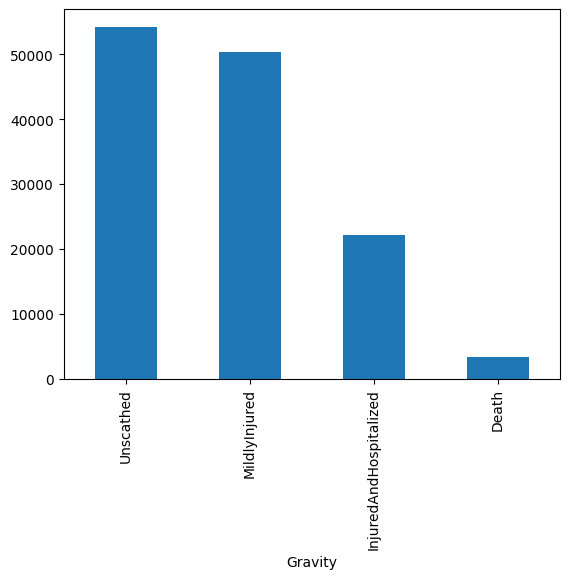

In [31]:
display(users_df.isna().sum())
users_df.Gravity.value_counts().plot(kind='bar')


In [15]:
vehicles_df = pd.read_csv('src/Vehicles.txt', index_col=0, encoding='ISO-8859-1', sep='\t')
vehicles_df.head()

,VehicleId,Direction,Category,PassengerNumber,FixedObstacle,MobileObstacle,ImpactPoint,Maneuver
AccidentId,,,,,,,,
201800000001,A01,Unknown,Car<=3.5T,0,NaN,Vehicle,RightFront,TurnToLeft
201800000001,B01,Unknown,Car<=3.5T,0,NaN,Vehicle,LeftFront,NoDirectionChange
201800000002,A01,Unknown,Car<=3.5T,0,NaN,Pedestrian,NaN,NoDirectionChange
201800000003,A01,Unknown,Motorbike>125cm3,0,StationaryVehicle,Vehicle,Front,NoDirectionChange
201800000003,B01,Unknown,Car<=3.5T,0,NaN,Vehicle,LeftSide,TurnToLeft


<Axes: xlabel='Direction'>

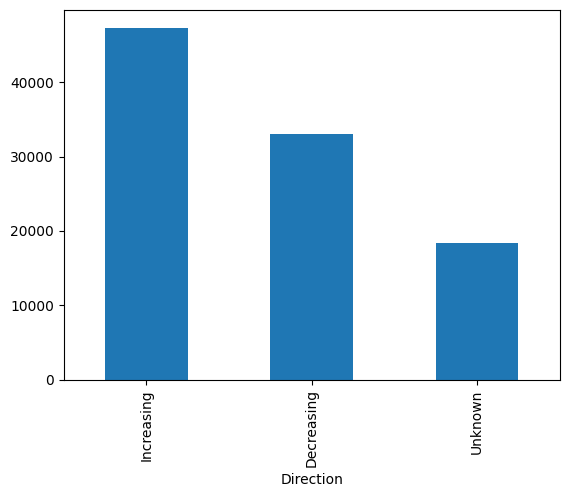

In [25]:
vehicles_df.Direction.value_counts().plot(kind='bar')

In [16]:
print(accidents_df.shape, users_df.shape, vehicles_df.shape)

(57783, 11) (130169, 12) (98876, 8)
